In [ ]:
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap

# Seaborn for easier visualization
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


<Axes: xlabel='emotion', ylabel='count'>

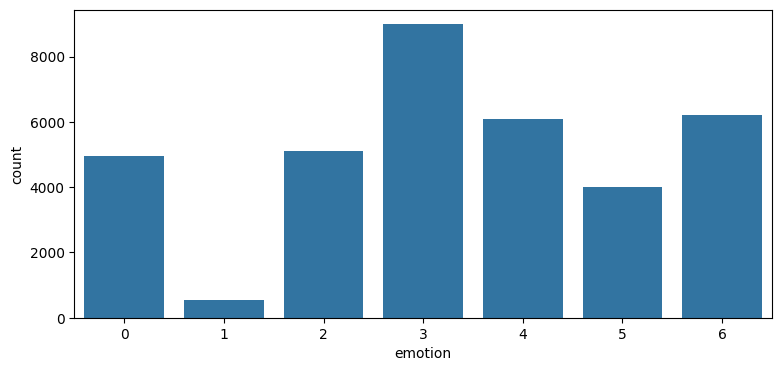

In [ ]:

""" matplotlib => to define size , sns => to use counterplot """

plt.figure(figsize=(9,4))
sns.countplot(x='emotion', data=df)

In [ ]:

df['emotion'].value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

<Axes: xlabel='Usage', ylabel='count'>

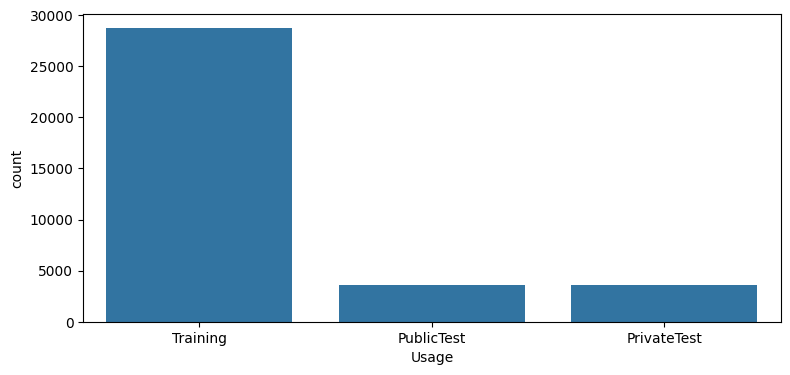

In [ ]:
plt.figure(figsize=(9,4))
sns.countplot(x='Usage', data=df)

In [ ]:
df['Usage'].value_counts()

Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

In [ ]:
import cv2
image_size=(48,48)

In [ ]:
pixels = df['pixels'].tolist()
width, height = 48, 48
faces = []

for pixel_sequence in pixels:
  face = [int(pixel) for pixel in pixel_sequence.split(' ')] # splitting space character as a list
  face = np.asarray(face).reshape(width, height) #con size of 48*48
  face = cv2.resize(face.astype('uint8'),image_size) #resi 48 cols (width) and 48 rows (height)
  faces.append(face.astype('float32')) #makes the list of each images of 48*48 and their pixels in numpyarray form

faces = np.asarray(faces) #converting the list into numpy array
faces = np.expand_dims(faces, -1) #Expand the shape of an array -1=last dimension => means color space
emotions = pd.get_dummies(df['emotion']).to_numpy() #doing the one hot encoding type on emotions

In [ ]:

print(faces[0]) #Pixels after preprocessing

[[[ 70.]
  [ 80.]
  [ 82.]
  ...
  [ 52.]
  [ 43.]
  [ 41.]]

 [[ 65.]
  [ 61.]
  [ 58.]
  ...
  [ 56.]
  [ 52.]
  [ 44.]]

 [[ 50.]
  [ 43.]
  [ 54.]
  ...
  [ 49.]
  [ 56.]
  [ 47.]]

 ...

 [[ 91.]
  [ 65.]
  [ 42.]
  ...
  [ 72.]
  [ 56.]
  [ 43.]]

 [[ 77.]
  [ 82.]
  [ 79.]
  ...
  [105.]
  [ 70.]
  [ 46.]]

 [[ 77.]
  [ 72.]
  [ 84.]
  ...
  [106.]
  [109.]
  [ 82.]]]


In [ ]:
print(faces.shape)
print(faces[0].ndim)
print(type(faces))

(35887, 48, 48, 1)
3
<class 'numpy.ndarray'>


In [ ]:
x = faces.astype('float32')
x = x / 255.0 # range(0,1)

# Scaling the pixels value in range(-1,1)
x = x - 0.5
x = x * 2.0

In [ ]:
print(x[0])

[[[-0.45098037]
  [-0.372549  ]
  [-0.35686272]
  ...
  [-0.5921569 ]
  [-0.6627451 ]
  [-0.6784314 ]]

 [[-0.49019605]
  [-0.52156866]
  [-0.54509807]
  ...
  [-0.56078434]
  [-0.5921569 ]
  [-0.654902  ]]

 [[-0.60784316]
  [-0.6627451 ]
  [-0.5764706 ]
  ...
  [-0.6156863 ]
  [-0.56078434]
  [-0.6313726 ]]

 ...

 [[-0.2862745 ]
  [-0.49019605]
  [-0.67058825]
  ...
  [-0.4352941 ]
  [-0.56078434]
  [-0.6627451 ]]

 [[-0.3960784 ]
  [-0.35686272]
  [-0.38039213]
  ...
  [-0.17647058]
  [-0.45098037]
  [-0.6392157 ]]

 [[-0.3960784 ]
  [-0.4352941 ]
  [-0.34117645]
  ...
  [-0.16862744]
  [-0.14509803]
  [-0.35686272]]]


In [ ]:

type(x)

numpy.ndarray

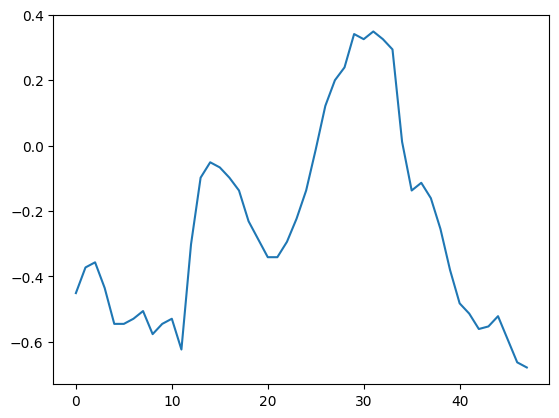

In [ ]:
plt.plot(x[0,0])
plt.show()

In [ ]:
print(x.min(),x.max()) # we can observe that pixels are scale

-1.0 1.0


In [ ]:

num_samples, num_classes = emotions.shape

num_samples = len(x)
num_train_samples = int((1 - 0.2)*num_samples)

# Traning data
train_x = x[:num_train_samples]
train_y = emotions[:num_train_samples]

# Validation data
val_x = x[num_train_samples:]
val_y = emotions[num_train_samples:]

train_data = (train_x, train_y)
val_data = (val_x, val_y)

In [ ]:

print('Training Pixels',train_x.shape)  # ==> 4 dims -  no of images , width , height , color
print('Training labels',train_y.shape)

print('Validation Pixels',val_x.shape)
print('Validation labels',val_y.shape)

Training Pixels (28709, 48, 48, 1)
Training labels (28709, 7)
Validation Pixels (7178, 48, 48, 1)
Validation labels (7178, 7)


In [ ]:
#load the libaray to built the model
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2

In [ ]:
input_shape=(48, 48, 1)
num_classes = 7

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.25))

    # Second Conv Block
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.25))

    # Third Conv Block
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.25))

    # Fourth Conv Block
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.25))

    # Fifth Conv Block
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.25))

    # Sixth Conv Block
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.25))

    # Seventh Conv Block
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.25))

    # Eighth Conv Block
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.25))

    # Ninth Conv Block
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.25))

    # Tenth Conv Block
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.25))

    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    return model

# Define the input shape and number of classes





In [ ]:
# Create the model
model = create_cnn_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_36 (Ba  (None, 48, 48, 32)        128       
 tchNormalization)                                               
                                                                 
 average_pooling2d_30 (Aver  (None, 24, 24, 32)        0         
 agePooling2D)                                                   
                                                                 
 dropout_37 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_37 (Ba  (None, 24, 24, 64)       

In [ ]:
# model.summary()

In [ ]:
# parameters
batch_size = 32 #Number of samples per gradient update
num_epochs = 200 # Number of epochs to train the model.
#input_shape = (64, 64, 1)
verbose = 1 #per epohs  progress bar
num_classes = 7
patience = 50
base_path = 'drive/Colab Notebooks/emotion/simplecnn/'

In [ ]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datasets = ['fer2013']
num_epochs = 100
base_path="/content"
for dataset_name in datasets:
    print('Training dataset:', dataset_name)

    #callbacks
    log_file_path = dataset_name + '_emotion_training.log'

    csv_logger = CSVLogger(log_file_path, append=False)
    early_stop = EarlyStopping('val_loss', patience=patience)
    reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,patience=int(patience/4), verbose=1)

    trained_models_path = base_path + dataset_name + 'simple_cnn'
    model_names = trained_models_path + '.{epoch:02d}-{val_loss:.2f}.hdf5'      # if error "acc" in 1 line ... don't confuse check entire block since fit() generates a inner loop
    model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,save_best_only=True)
    my_callbacks = [model_checkpoint, csv_logger, early_stop, reduce_lr]

    # loading dataset
    train_faces, train_emotions = train_data
    history=model.fit_generator(data_generator.flow(train_faces, train_emotions,
                                            batch_size),
                        epochs=num_epochs, verbose=1
                        ,callbacks=my_callbacks,validation_data =val_data)   #not callbacks = [my_callbacks] since we my_callbacks is already a list

Training dataset: fer2013
Epoch 1/100


<ipython-input-42-33bcb015f9d4>:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(data_generator.flow(train_faces, train_emotions,


897/898 [============================>.] - ETA: 0s - loss: 2.0956 - accuracy: 0.2078
Epoch 1: val_loss improved from inf to 1.89104, saving model to /contentfer2013simple_cnn.01-1.89.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


898/898 [==============================] - 41s 30ms/step - loss: 2.0952 - accuracy: 0.2079 - val_loss: 1.8910 - val_accuracy: 0.2392 - lr: 0.0010
Epoch 2/100
898/898 [==============================] - ETA: 0s - loss: 1.8191 - accuracy: 0.2422
Epoch 2: val_loss improved from 1.89104 to 1.81766, saving model to /contentfer2013simple_cnn.02-1.82.hdf5
898/898 [==============================] - 24s 27ms/step - loss: 1.8191 - accuracy: 0.2422 - val_loss: 1.8177 - val_accuracy: 0.2601 - lr: 0.0010
Epoch 3/100
897/898 [============================>.] - ETA: 0s - loss: 1.7628 - accuracy: 0.2814
Epoch 3: val_loss improved from 1.81766 to 1.69758, saving model to /contentfer2013simple_cnn.03-1.70.hdf5
898/898 [==============================] - 23s 25ms/step - loss: 1.7626 - accuracy: 0.2817 - val_loss: 1.6976 - val_accuracy: 0.3233 - lr: 0.0010
Epoch 4/100
896/898 [============================>.] - ETA: 0s - loss: 1.6749 - accuracy: 0.3346
Epoch 4: val_loss improved from 1.69758 to 1.55869, savin

In [ ]:
score = model.evaluate(val_x, val_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

225/225 [==============================] - 1s 6ms/step - loss: 0.9211 - accuracy: 0.6500
Test loss: 0.921080470085144
Test accuracy: 65.00418186187744


In [ ]:
""" metrics collected by history object """
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [ ]:
print(history_dict["accuracy"])

[0.2079487293958664, 0.24218885600566864, 0.2816886603832245, 0.33456405997276306, 0.3746212124824524, 0.41415584087371826, 0.4356473684310913, 0.4532724916934967, 0.46253788471221924, 0.47079312801361084, 0.4782124161720276, 0.48956772685050964, 0.4945835769176483, 0.5006792545318604, 0.5088996291160583, 0.50677490234375, 0.5197673439979553, 0.5274304151535034, 0.5304956436157227, 0.5366261601448059, 0.5411543250083923, 0.5391340851783752, 0.5471454858779907, 0.55021071434021, 0.5527883172035217, 0.5495837330818176, 0.5593019723892212, 0.562576174736023, 0.5624368786811829, 0.5643178224563599, 0.5690898299217224, 0.5681493878364563, 0.5716674327850342, 0.5738967061042786, 0.5791912078857422, 0.5751854777336121, 0.5813159346580505, 0.5818036198616028, 0.5877947807312012, 0.5853216648101807, 0.5857744812965393, 0.5857048034667969, 0.5906858444213867, 0.5882824063301086, 0.5930196046829224, 0.5939949154853821, 0.5895015597343445, 0.5954578518867493, 0.599393904209137, 0.5983837842941284,

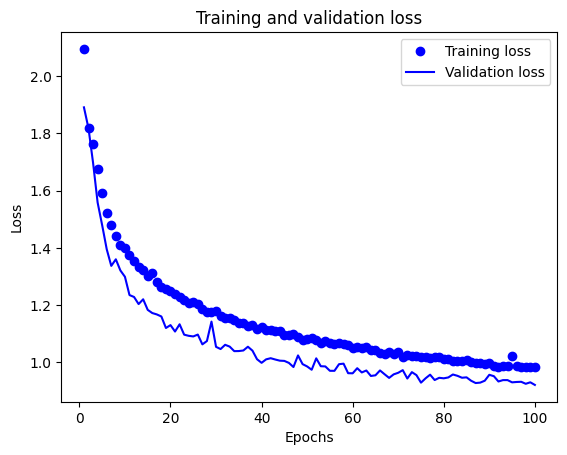

In [ ]:
import matplotlib.pyplot as plt

train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/FER_Final.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# print(emojis.values(),sep=" ")

In [ ]:

# from google.colab.patches import cv2_imshow
# import cv2

# def _predict(path):
#   facecasc = cv2.CascadeClassifier('/content/drive/MyDrive/haarcascade_frontalface_default.xml')
#   imagePath = '/content/'+path
#   image = cv2.imread(imagePath)
#   gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#   faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=10)
#   print("No of faces : ",len(faces))
#   i = 1
#   for (x, y, w, h) in faces:
#     cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
#     roi_gray = gray[y:y + h, x:x + w]                      #croping
#     cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
#     prediction = model.predict(cropped_img)
#     # class_index = np.argmax(prediction)
#     # class_labels = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7']  # Replace with your actual class labels
#     # predicted_class = class_labels[class_index[0]]
#     # print(f'Predicted class: {predicted_class}')





#     maxindex = int(np.argmax(prediction))
#     class_labels = ['An', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7']  # Replace with your actual class labels
#     predicted_class = class_labels[maxindex[0]]
#     print(f'Predicted class: {predicted_class}')
#     # print("person ",i," : ",emotion_dict[maxindex], "-->",emojis[maxindex])
#     # cv2.putText(image, emotion_dict[maxindex], (x+10, y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
#                                               #if text is not apeared , change coordinates. it may work

#   cv2_imshow(image)



In [ ]:
# class_index = np.argmax(prediction)
# class_labels = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7']  # Replace with your actual class labels
# predicted_class = class_labels[class_index[0]]
# print(f'Predicted class: {predicted_class}')


In [ ]:
_predict("drive/MyDrive/anger.jpg")

No of faces :  1
1/1 [==============================] - 0s 18ms/step


TypeError: 'int' object is not subscriptable

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load your saved model
model_path = 'C:/Users/ankus/PycharmProjects/pythonProject3/FER_Final.h5'
model = load_model(model_path)

# Load the face detection model (Haar cascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/content/drive/MyDrive/haarcascade_frontalface_default.xml')

# Define the labels for your emotions
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']  # Modify as per your model's classes

# Start video capture from the webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale (Haar cascade works on grayscale images)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Extract the face region
        face = gray[y:y+h, x:x+w]

        # Preprocess the face region (resize, expand dims, normalize)
        face = cv2.resize(face, (48, 48))  # Assuming the model was trained on 48x48 images
        face = face.astype('float32') / 255.0  # Normalize the pixel values
        face = np.expand_dims(face, axis=-1)  # Add the channel dimension
        face = np.expand_dims(face, axis=0)  # Add the batch dimension

        # Predict the emotion
        prediction = model.predict(face)
        class_index = np.argmax(prediction)
        emotion = class_labels[class_index]

        # Draw a rectangle around the face and put the emotion label
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the resulting frame
    cv2.imshow('Facial Emotion Recognition', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture and close the windows
cap.release()
cv2.destroyAllWindows()
